In [1]:
import pandas as pd 
import numpy as np
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt, dates

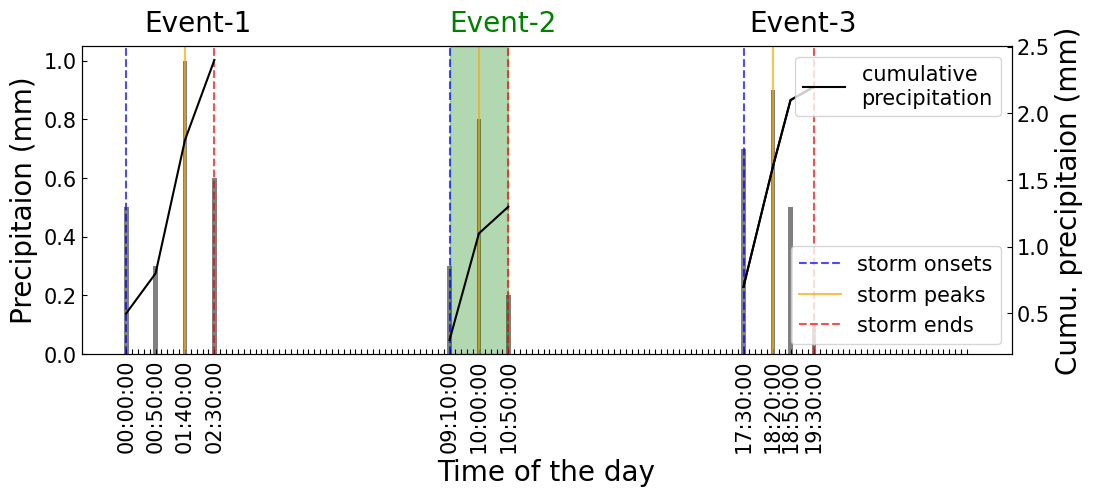

In [8]:
x_date_time = pd.date_range("2022-01-01", periods=24 * 6, freq= "10T")
x_label = x_date_time.strftime('%H:%M:%S')

y_data = pd.DataFrame([0] * x_date_time.shape[0], columns=["precip"], index = x_date_time)

event1 = [[0, 5, 10, 15], 
          [0.5, 0.3, 1, 0.6]]
event2 = [[55, 60, 65],
          [ 0.3, 0.8, 0.2]]

event3 = [[105, 110, 113, 117], 
          [0.7, 0.9, 0.5, 0.1]]

y_data.iloc[event1[0] + event2[0] + event3[0], :] = event1[1] + event2[1] + event3[1]


x_label_str = [x_label[i] if y_data.iloc[i, 0] > 0 else " " for i in np.arange(len(x_label))]
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(np.arange(x_date_time.shape[0]), y_data["precip"], color = "grey")
ax.set_xticks(np.arange(x_date_time.shape[0]))
ax.set_xticklabels(x_label_str, rotation="vertical") 


ax.axvline(0, c= "blue", ls = "dashed", label = "storm onsets", alpha = 0.7)
ax.axvline(10, c= "orange", ls = "solid", label = "storm peaks", alpha = 0.7)
ax.axvline(15, c= "red", ls = "dashed", label = "storm ends", alpha = 0.7)

ax.axvline(55, c= "blue", ls = "dashed", alpha = 0.7)
ax.axvline(60, c= "orange", ls = "solid", alpha = 0.7)
ax.axvline(65, c= "red", ls = "dashed", alpha = 0.7)


ax.axvline(105, c= "blue", ls = "dashed",alpha = 0.7)
ax.axvline(110, c= "orange", ls = "solid",  alpha = 0.7)
ax.axvline(117, c= "red", ls = "dashed",  alpha = 0.7)

ax.text(3, 1.1, "Event-1",fontsize = 20)
ax.text(55, 1.1, "Event-2", color = "green", fontsize = 20)
ax.text(106, 1.1, "Event-3",fontsize = 20)
ax.set_xlabel("Time of the day",fontsize = 20)
ax.legend(loc = "lower right",fontsize = 15)
ax.set_ylabel("Precipitaion (mm)",fontsize = 20)
ax2 = ax.twinx()

for j in [event1, event2, event3]:
    sum_list = []
    sum = 0
    for s in j[1]:
        sum = sum + s
        sum_list.append(sum)
    
    ax2.plot(j[0], sum_list, "black")
    if j == event3:
        ax2.plot(j[0], sum_list, "black",label = "cumulative \nprecipitation")
ax2.legend(loc = "upper right", fontsize = 15)
ax2.set_ylabel("Cumu. precipitaion (mm)", fontsize = 20)
ax.axvspan(55, 65, alpha=0.3, color='green')
ax.tick_params("both", direction = 'in', labelsize = 15)

ax2.tick_params("both", direction = 'in', labelsize = 15)


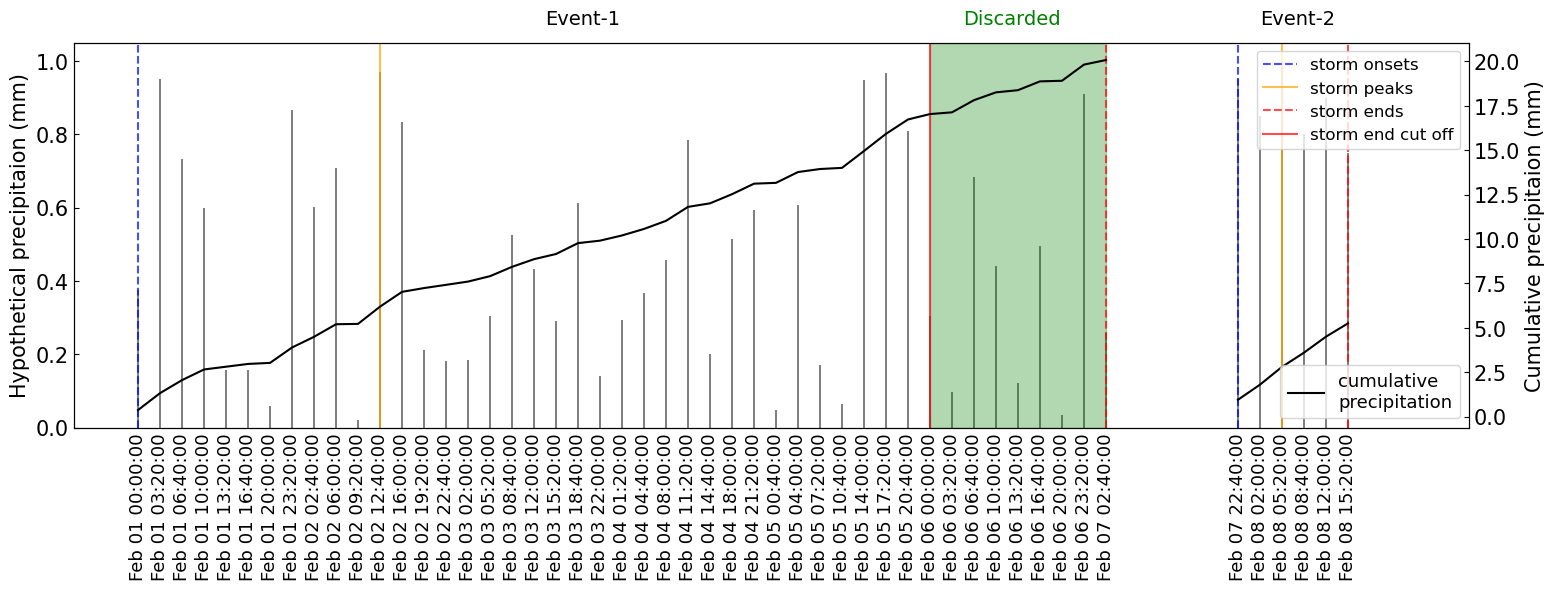

In [3]:
x_date_time = pd.date_range("2022-02-01", periods=24 * 6 * 8, freq= "10T")
x_label = x_date_time.strftime('%b %d %H:%M:%S')

y_data = pd.DataFrame([0] * x_date_time.shape[0], columns=["precip"], index = x_date_time)

event1 = np.arange(0, 900, 20)
np.random.seed(42)
random_precip = np.random.random(len(event1))

event2 = [1000, 1020, 1040, 1060, 1080, 1100
          ]
event2_values = [0.95, 0.85, 1, 0.8, 0.9, 0.75]

y_data.iloc[event1, 0] = random_precip
y_data.iloc[event2, 0] = event2_values
x_label_str = [x_label[i] if y_data.iloc[i, 0] > 0 else " " for i in np.arange(len(x_label))]

fig, ax = plt.subplots(figsize=(18,5))
ax.bar(np.arange(y_data.shape[0]), y_data["precip"], color = "grey", width= 2)
ax.set_xticks(np.arange(x_date_time.shape[0]))
ax.set_xticklabels(x_label_str, rotation="vertical") 

ax.axvline(0, c= "blue", ls = "dashed", label = "storm onsets", alpha = 0.7)
ax.axvline(event1[np.argmax(random_precip)], c= "orange", ls = "solid", label = "storm peaks", alpha = 0.7)
ax.axvline(880, c= "red", ls = "dashed", label = "storm ends", alpha = 0.7)
ax.axvline(720, c= "red", ls = "solid", label = "storm end cut off", alpha = 0.7)

ax.tick_params("x", length = 0)

ax.text(370, 1.1, "Event-1",fontsize = 14)
ax.text(1020, 1.1, "Event-2", fontsize = 14)
ax.text(750, 1.1, "Discarded", fontsize = 14, color = "green")

ax.axvline(1000, c= "blue", ls = "dashed", alpha = 0.7)
ax.axvline(1040, c= "orange", ls = "solid", alpha = 0.7)
ax.axvline(1100, c= "red", ls = "dashed", alpha = 0.7)

# ax.legend(loc = "center",fontsize = 12)
ax.set_ylabel("Hypothetical precipitaion (mm)",fontsize = 15)
ax.legend(fontsize = 12, loc ="upper right")
ax2 = ax.twinx()

ax2.plot(event1, np.cumsum(random_precip), c = "black", label = "cumulative \nprecipitation")
ax2.plot(event2, np.cumsum(event2_values), c = "black")

ax2.legend(loc = "lower right", fontsize = 13)
ax2.set_ylabel("Cumulative precipitaion (mm)", fontsize = 15)
ax.axvspan(720, 880, alpha=0.3, color='green')
ax.tick_params("x", direction = 'in', labelsize = 13)
ax.tick_params("y", direction = 'in', labelsize = 15)

ax2.tick_params("x", direction = 'in', labelsize = 13)
ax2.tick_params("y", direction = 'in', labelsize = 15)


In [4]:
y_data

,precip
2022-02-01 00:00:00,0.37454
2022-02-01 00:10:00,0.00000
2022-02-01 00:20:00,0.00000
2022-02-01 00:30:00,0.00000
2022-02-01 00:40:00,0.00000
...,...
2022-02-08 23:10:00,0.00000
2022-02-08 23:20:00,0.00000
2022-02-08 23:30:00,0.00000
2022-02-08 23:40:00,0.00000
